In [1]:
from ToFCIMSAnalysis.peaklist.kmd import KMD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Peaklist

Load and run

Initialise the KMD object by providing the path and file name and hit .Run(). This prompts the user to input which kendrick bases the analysis should be performed on. It also asks for a pattern that all the unknown peaks are identified with - this is so these may be queried later

In [2]:
kmd = KMD("./tests/test_data/","test_peaklist.txt")
kmd.Run()

List your Kendrick bases: ch2
Matching Peaks on kendrick base CH2
Updated peaklist written to updated_test_peaklist.txt
Enter common pattern of unknown ion names: u
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist.json


The matches are writen to a json file that can be read and queried to look for matches

In [3]:
match_data = pd.read_json("./tests/test_data/test_matched_id_data.json",orient="index")
match_data.loc['m132','CH2']

{u'C2H6ON': u'C4H10NO',
 u'm122': None,
 u'm132': None,
 u'm232': None,
 u'm332': None}

multiple KMD objects can be run on seperate peaklists

In [21]:
kmd2 = KMD("./tests/test_data/","test_peaklist2.txt")
kmd2.Run()

List your Kendrick bases: ch2
Matching Peaks on kendrick base CH2
Updated peaklist written to updated_test_peaklist2.txt
Enter common pattern of unknown ion names: u
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist2.json


In [22]:
kmd3 = KMD("./tests/test_data/","test_peaklist3.txt")
kmd3.Run()

List your Kendrick bases: ch2
Matching Peaks on kendrick base CH2
Updated peaklist written to updated_test_peaklist3.txt
Enter common pattern of unknown ion names: unknown
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist3.json


We can extract the element distributions of the identified species in the peaklists and specify which elements we are interested in

In [28]:
d1 = kmd.ElementDistributions(kmd.peaklist.ion.values, ['C','H','O','N'])
d2 = kmd.ElementDistributions([x for x in kmd2.peaklist.ion.values if "unknown" not in x], ['C','H','O'])
d3 = kmd.ElementDistributions(kmd3.peaklist.ion.values, ['C','H','O'])
d1.head()

,C,H,O,N
0,23.0,23.0,23.0,25.0
1,0.0,0.0,3.0,2.0
2,3.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


These can then be plotted as frequency distributions. Up to 3 different peaklists can be compared on the same plot (more than 3 gets confusing to look at)

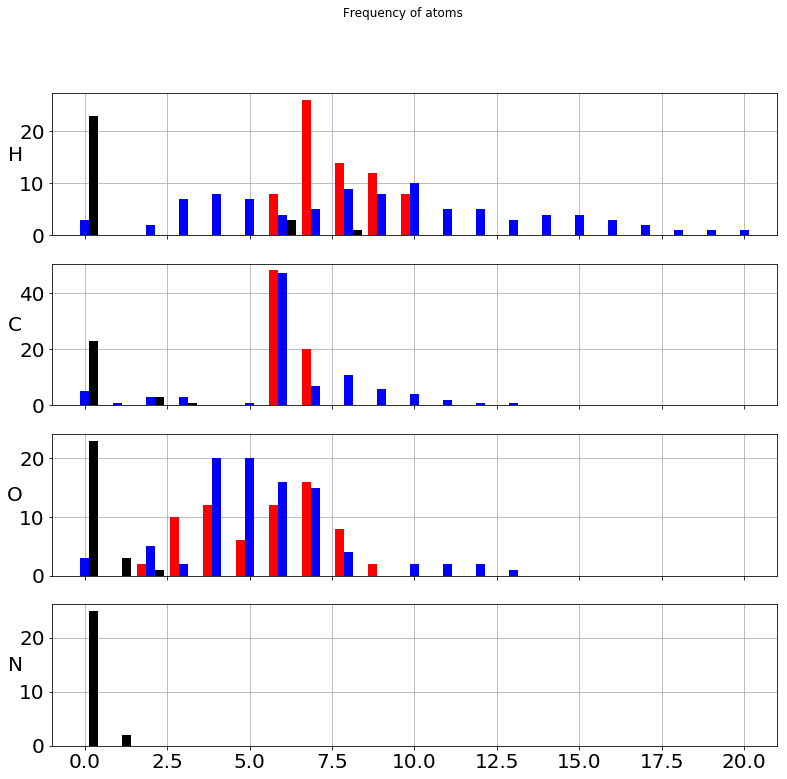

In [29]:
ax = kmd.ElementDistributionsPlot([d3, d2, d1])

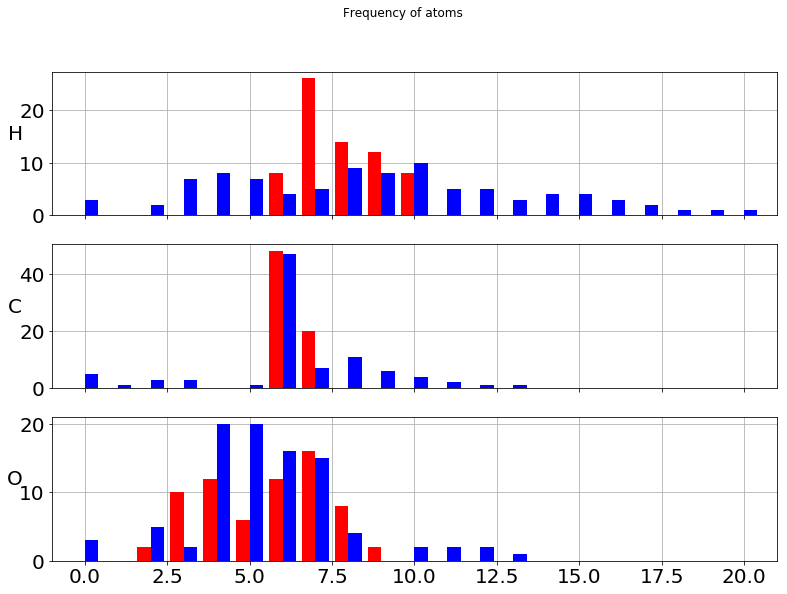

In [39]:
ax = kmd.ElementDistributionsPlot([d3, d2])

The organic characteristics of the identified species can also be calculated. These are the O:C, H:C, N:C and OSc.

In [30]:
org_characteristics = kmd.OrganicCharacteristics(kmd.peaklist.ion);
org_characteristics2 = kmd.OrganicCharacteristics(kmd2.peaklist.ion);
org_characteristics3 = kmd.OrganicCharacteristics(kmd3.peaklist.ion);
org_characteristics3.head()

,ion,I,H,C,O,N,O:C,H:C,N:C,OSc
0,IC6H7O3-,1,7,6,3,0,0.500000,1.166667,NaN,-0.2
1,IC6H8O3-,1,8,6,3,0,0.500000,1.333333,NaN,-0.3
2,IC6H6O2-,1,6,6,2,0,0.333333,1.000000,NaN,-0.3
3,IC6H7NO4-,1,7,6,4,1,0.666667,1.166667,0.166667,-0.7
4,IC7H9O7-,1,9,7,7,0,1.000000,1.285714,NaN,0.7


These can also be plotted.

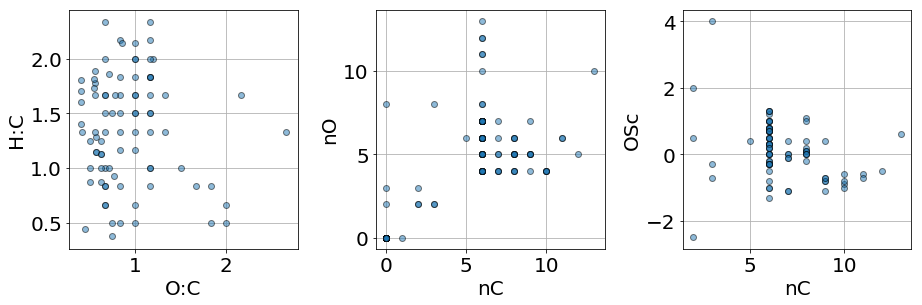

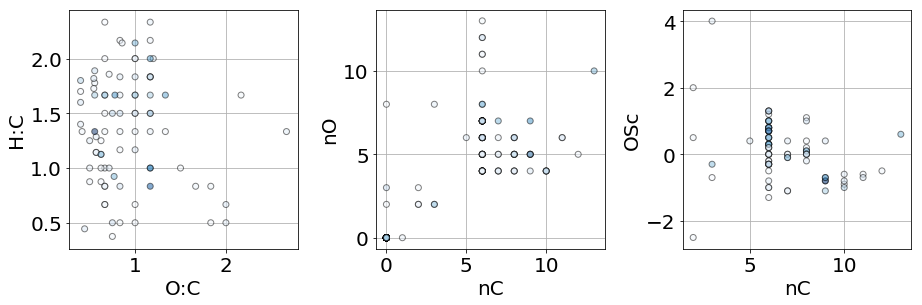

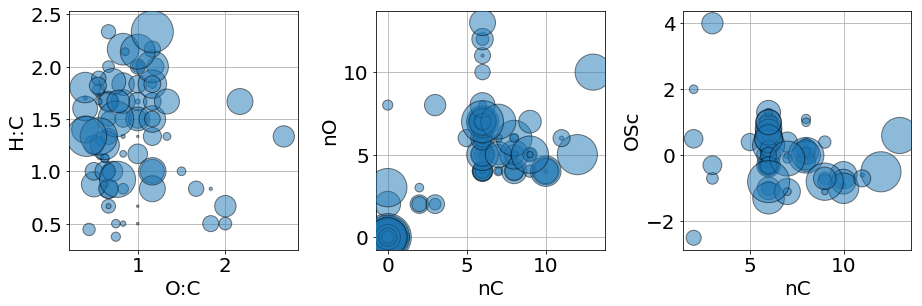

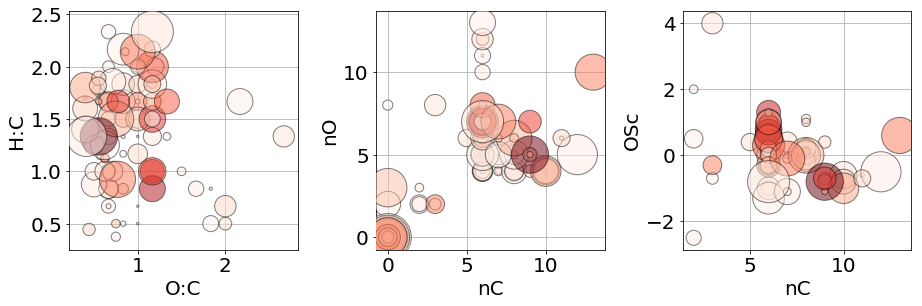

In [31]:
# generate random values. Here you could use peak intensity or something
alphas2 = [abs(x)*i for i, x in enumerate(np.random.randn(org_characteristics2.shape[0]))]
sizes2 = [abs(x)*i*5 for i, x in enumerate(np.random.randn(org_characteristics2.shape[0]))]

kmd.OrganicCharacteristicsPlot(org_characteristics2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, alphas=alphas2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, sizes=sizes2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, cmap="Reds", sizes=sizes2, alphas=alphas2);

## Time series

The package also contains a routine to count the different cycles

In [32]:
from ToFCIMSAnalysis.timeseries.timeseries import TimeSeries

In [33]:
ts = TimeSeries()
data = pd.read_csv("tests/test_data/timeseries.csv", parse_dates=True, index_col="date:time")
data.head()

,temperature,state_name,m150,m151,m152,m153,m154,m155,m156,m157,...,m591,m592,m593,m594,m595,m596,m597,m598,m599,m600
date:time,,,,,,,,,,,,,,,,,,,,,
2015-10-11 11:10:54,62.04,0,126.879,35.8394,41.9620,18.9772,21.9177,165.993,13.3677,29.6979,...,6.76749,0.130209,1.17704,0.315099,1.16984,0.619629,1.20850,0.326151,2.15955,-0.058400
2015-10-11 11:11:24,56.35,0,133.269,39.3286,39.0736,17.4864,22.2083,161.082,18.6996,29.7746,...,7.60827,0.549669,1.34741,0.659218,1.08103,0.194152,1.43849,0.520368,2.75311,0.881759
2015-10-11 11:11:54,51.22,0,135.194,39.8157,43.2688,27.1620,25.3500,158.040,13.1785,30.5549,...,7.49901,1.732530,1.96174,0.716308,1.50135,0.632518,1.81397,0.395645,1.78711,0.634171
2015-10-11 11:12:24,46.79,0,134.460,37.7058,38.4336,22.7665,18.6913,153.271,16.8391,32.8211,...,6.41910,1.664120,1.94553,1.321940,1.90371,0.794163,2.10082,1.260640,2.92905,1.729330
2015-10-11 11:12:54,42.96,0,131.286,29.6331,39.5913,21.5025,21.1221,157.212,17.4272,29.7351,...,6.02088,1.539170,1.41683,0.754269,1.15849,0.298817,1.17376,0.307338,1.65594,0.286460


Here you can see the figaero cycling in the 'state_name' column of the csv file.

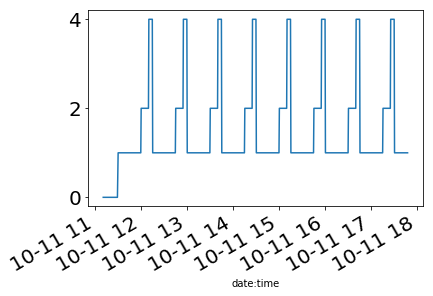

In [34]:
data['state_name'].plot();

 The CountCycles method counts the number of periods within the cycle and fills a new column, in this instance called 'figaero_cycle', with the number of that cycle.

In [35]:
data = ts.CountCycles(df=data,
                      mask_column_name="state_name",
                      new_cycle_column_name="Figaero_cycle",
                      last_num_in_seq=1,
                      first_num_in_seq=4)

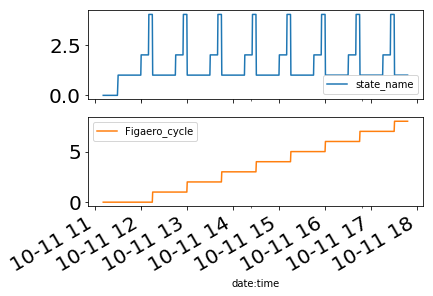

In [36]:
data[['state_name','Figaero_cycle']].plot(subplots=True);

We use the counted cycles to identify where the integration for the figaero particle data should take place. 

In [37]:
data = ts.IntegrateFIGAERO(df=data,
                            columns_to_integrate=[x for x in data.columns if len(x)==4],
                            mask_column_name='state_name',
                            figaero_cycle_column_name="Figaero_cycle",
                            figaero_integrate_mask_val=[2, 4],
                            gas_sample_mask_val=1);

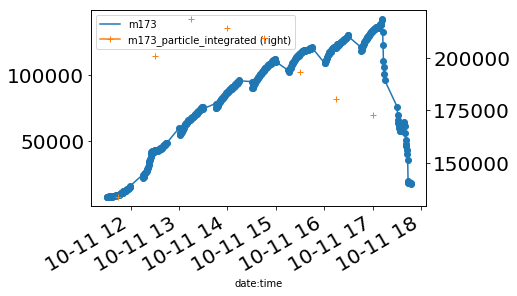

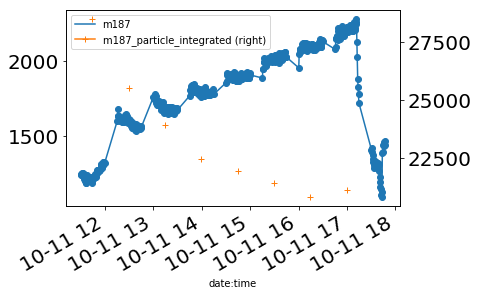

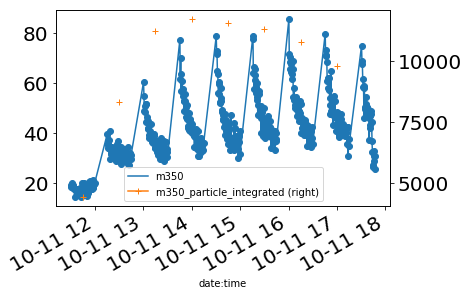

In [38]:
masses = ["m173", "m187", "m350"];
for mass in masses:
    data.loc[(data["state_name"] == 1), mass].plot(marker="o", legend=True);
    data[mass+"_particle_integrated"].plot(marker="+", secondary_y=True, legend=True);
    plt.show();